In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.shape

(3276, 10)

In [4]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [6]:
data["Potability"].value_counts()


,count
Potability,
0,1998
1,1278


In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


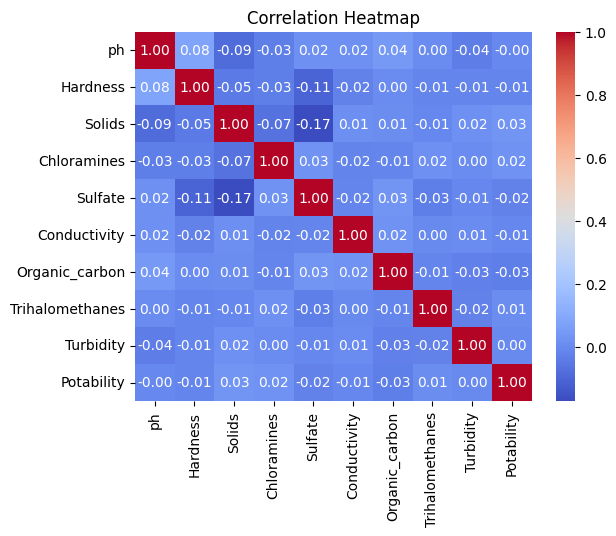

In [11]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
imputer = SimpleImputer(strategy="mean")
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [14]:
data.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [15]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


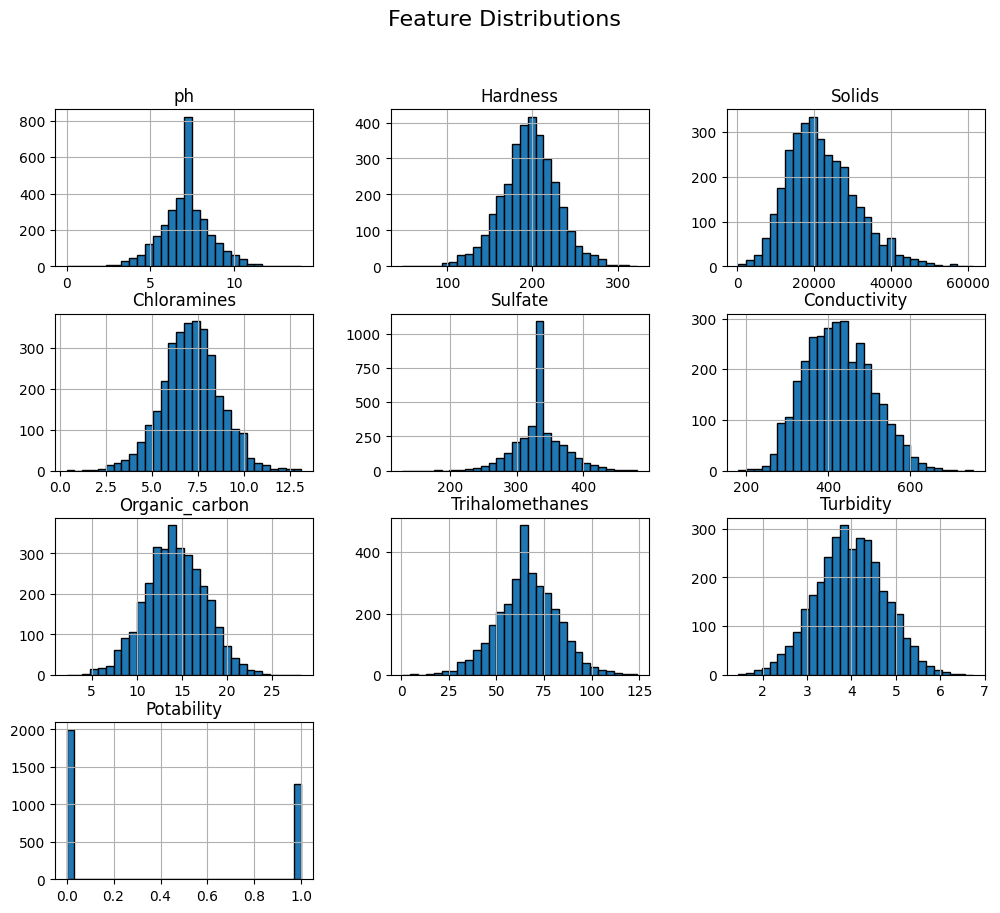

In [18]:
data.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions",fontsize=16)
plt.show()

In [22]:
scaler = StandardScaler()
X = data.drop("Potability", axis=1)
y = data["Potability"]

X_scaled = scaler.fit_transform(X)

In [23]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [25]:
X_resampled, y_resampled

(array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
         -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
        [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
          2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
        [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
          7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
        ...,
        [ 4.06958288e-02, -1.84012818e+00,  1.14864705e+00, ...,
          1.22556299e-01,  5.76222365e-02,  1.14848751e+00],
        [-7.97726571e-03, -4.69283556e-01,  9.31505641e-01, ...,
         -8.92061165e-01,  1.51502712e-01, -2.45336073e-01],
        [ 2.25687375e-01,  3.78714608e-01, -3.08981912e-01, ...,
         -1.33926265e-01,  1.31286063e+00,  1.52234051e+00]]),
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 3991    1.0
 3992    1.0
 3993    1.0
 3994    1.0
 3995    1.0
 Name: Potability, Length: 3996, dtype: float64)

In [26]:
X_final=pd.DataFrame(X_resampled, columns=X.columns)
X_final.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786


In [27]:
y_final = y_resampled

In [28]:
y_final.head()

,Potability
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
